In [14]:
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [17]:
class MachineLearning():

    def __init__(self):
        
        print("Loading dataset ...")
        
        self.flow_dataset = pd.read_csv('FlowStatsfile.csv')

        self.flow_dataset.iloc[:, 2] = self.flow_dataset.iloc[:, 2].str.replace('.', '')
        self.flow_dataset.iloc[:, 3] = self.flow_dataset.iloc[:, 3].str.replace('.', '')
        self.flow_dataset.iloc[:, 5] = self.flow_dataset.iloc[:, 5].str.replace('.', '')   

    def flow_training(self):

        print("Flow Training ...")
        
        X_flow = self.flow_dataset.iloc[:, :-1].values
        X_flow = X_flow.astype('float64')

        y_flow = self.flow_dataset.iloc[:, -1].values

        X_flow_train, X_flow_test, y_flow_train, y_flow_test = train_test_split(X_flow, y_flow, test_size=0.25, random_state=0)

        classifier = GaussianNB()
        flow_model = classifier.fit(X_flow_train, y_flow_train)

        y_flow_pred = flow_model.predict(X_flow_test)
        
        print("------------------------------------------------------------------------------")

        print("confusion matrix")
        cm = confusion_matrix(y_flow_test, y_flow_pred)
        print(cm)

        acc = accuracy_score(y_flow_test, y_flow_pred)

        print("succes accuracy = {0:.2f} %".format(acc*100))
        fail = 1.0 - acc
        print("fail accuracy = {0:.2f} %".format(fail*100))
        print("------------------------------------------------------------------------------")
        
        x = ['TP','FP','FN','TN']
        plt.title("Naive Bayes")
        plt.xlabel('Class predict')
        plt.ylabel('Number of flows')
        plt.tight_layout()
        plt.style.use("ggplot")
        y = [cm[0][0],cm[0][1],cm[1][0],cm[1][1]]
        plt.bar(x,y, color="#0000ff", label='NB')
        plt.legend()
        plt.show()

Loading dataset ...
Flow Training ...
------------------------------------------------------------------------------
confusion matrix
[[226596      0]
 [190669 249616]]
succes accuracy = 71.41 %
fail accuracy = 28.59 %
------------------------------------------------------------------------------


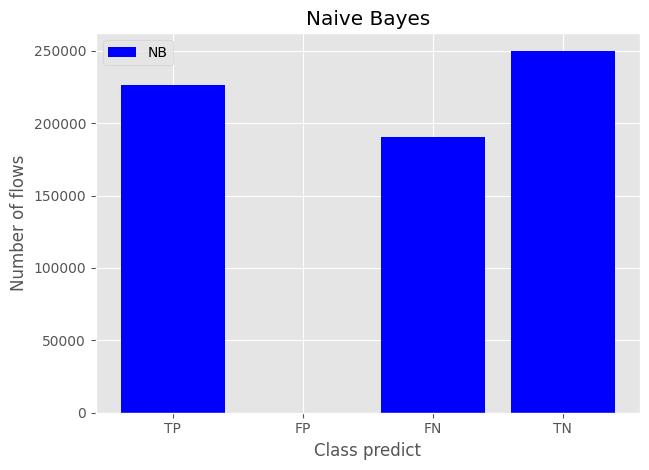

Training time:  0:00:16.285634


In [18]:
def main():
    start = datetime.now()
    
    ml = MachineLearning()
    ml.flow_training()

    end = datetime.now()
    print("Training time: ", (end-start)) 

if __name__ == "__main__":
    main()